# TASK-3

**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [5]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [6]:
data = pd.read_csv('bank.csv',sep=';')

In [ ]:
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [8]:
print(data.describe(include='all'))

                age         job  marital  education default       balance  \
count   4521.000000        4521     4521       4521    4521   4521.000000   
unique          NaN          12        3          4       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         969     2797       2306    4445           NaN   
mean      41.170095         NaN      NaN        NaN     NaN   1422.657819   
std       10.576211         NaN      NaN        NaN     NaN   3009.638142   
min       19.000000         NaN      NaN        NaN     NaN  -3313.000000   
25%       33.000000         NaN      NaN        NaN     NaN     69.000000   
50%       39.000000         NaN      NaN        NaN     NaN    444.000000   
75%       49.000000         NaN      NaN        NaN     NaN   1480.000000   
max       87.000000         NaN      NaN        NaN     NaN  71188.000000   

       housing  loan   contact          day month     duration     campaign

In [9]:
print("\nClass Distribution:")
print(data['y'].value_counts())


Class Distribution:
y
no     4000
yes     521
Name: count, dtype: int64


**Preprocessing**

In [10]:
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8718232044198895


In [12]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.41818181818181815


In [13]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.46938775510204084


In [14]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.4423076923076923


In [15]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



In [16]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[743  64]
 [ 52  46]]


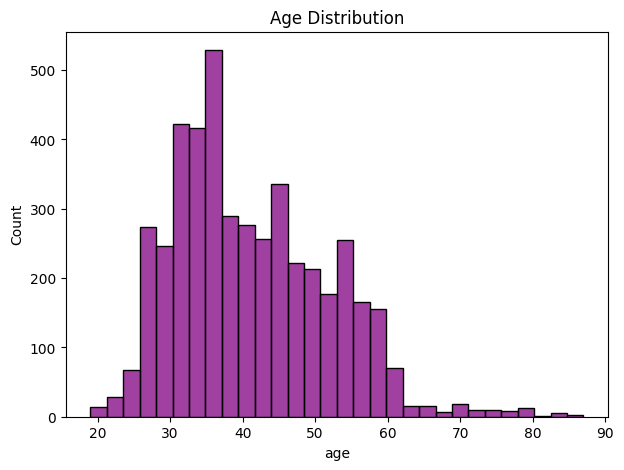

In [35]:
plt.figure(figsize=(7,5))
plt.title('Age Distribution')
sns.histplot(data['age'],bins=30,color='purple')
plt.show()

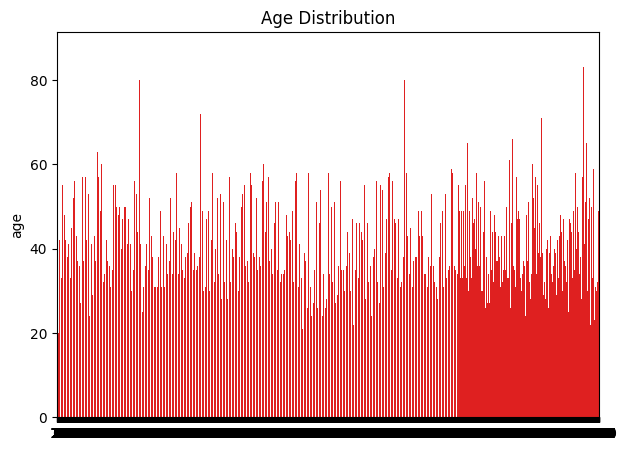

In [41]:
# prompt: barplot

plt.figure(figsize=(7,5))
plt.title('Age Distribution')
sns.barplot(data['age'],color='r')
plt.show()


<Axes: >

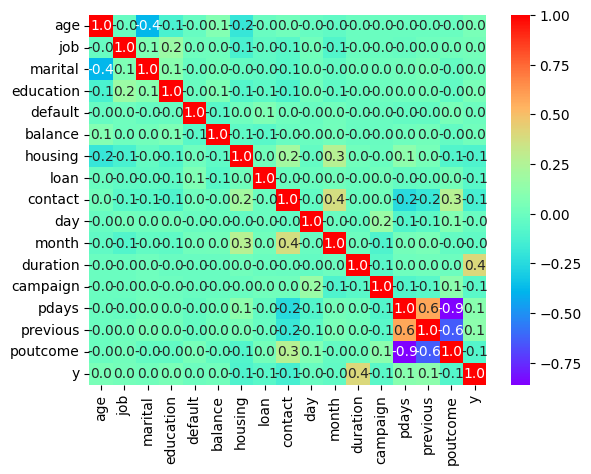

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='rainbow',fmt='.1f')

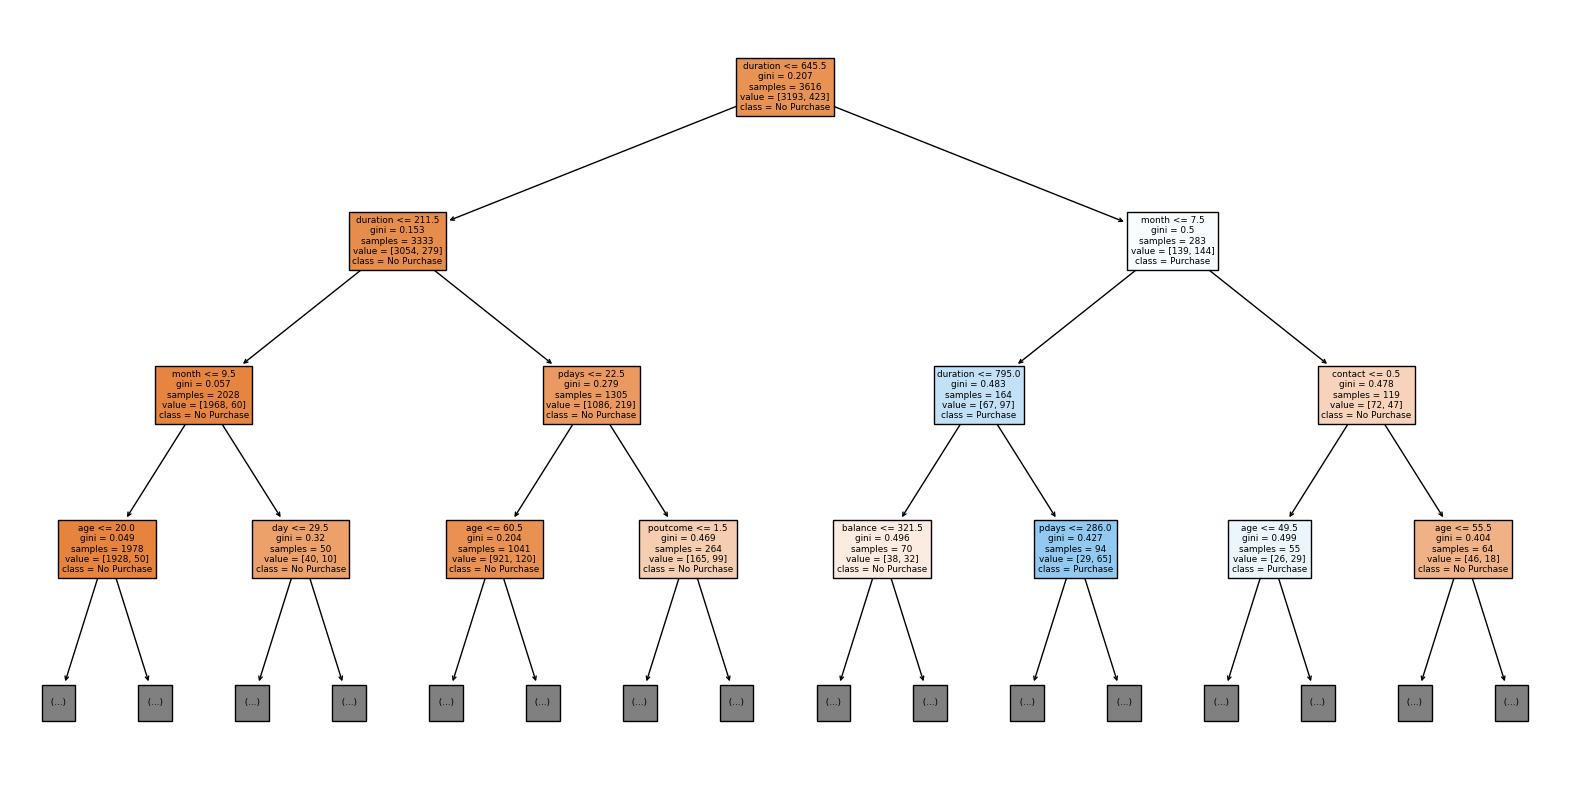

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], max_depth=3)
plt.show()

<Axes: >

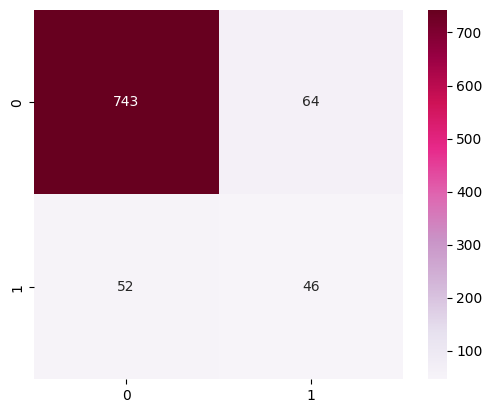

In [19]:

conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,square=True,fmt='d',cmap='PuRd')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



**Result : DecisionTreeClassifier Model performing really well, scoring 1.0 on the training data and 87% on the test data. This means it's good at making accurate predictions**